# **Zillow Clustering Project**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

## **Acquire Data**
-------

In [2]:
df = wrangle.get_zillow()

In [3]:
# take a look at duplicates of rows
df.duplicated().any()

False

In [4]:
# take a look at duplicates of columns
df.columns.duplicated().any()

True

In [5]:
# first drop duplicate columns from the query
df = df.loc[:, ~df.columns.duplicated()]

In [6]:
# use my get info function to get more information about the dataframe
wrangle.get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   transactiondate               77381 non-null  object 
 9   id                            77381 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77381 non-null  float64
 12  bedroomcnt                    77381 non-null  float64
 13  b

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,...,taxdelinquencyyear,censustractandblock,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
75055,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12042490,2017-09-11,2689894,...,NaN,6.037300e+13,0.350066,Central,None,None,Central,Single Family Residential,None,None
72072,NaN,NaN,266.0,2.0,NaN,NaN,1.0,11082573,2017-08-31,2955350,...,NaN,6.037111e+13,0.035953,Central,None,None,Central,Condominium,None,None
68853,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11578741,2017-08-22,839413,...,NaN,6.037702e+13,-0.012175,None,None,None,Central,Single Family Residential,None,None


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


## Acquire Takeaways
- I brought in SQL data using SQL query.
- This is a large dataset with many nulls.
- There were duplicate columns but no duplicate rows.


## **Prepare Data**
---

In [8]:
# let's take a look at the nulls in the dataframe by column
wrangle.nulls_by_column(df)

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


In [9]:
# let's take a look at the nulls in the dataframe by row
wrangle.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,33.82352941176471,2
1,24,35.294117647058826,13
2,25,36.76470588235294,24
3,26,38.23529411764706,65
4,27,39.705882352941174,316
5,28,41.17647058823529,455
6,29,42.64705882352941,5270
7,30,44.11764705882353,3455
8,31,45.588235294117645,9891
9,32,47.05882352941176,12579


In [10]:
# use my drop nulls function to drop a percentage of nulls per column and row
wrangle.drop_nulls(df, .70, .70)

,propertylandusetypeid,parcelid,transactiondate,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,propertylandusedesc
0,261.0,14297519,2017-01-01,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,Single Family Residential
1,261.0,17052889,2017-01-01,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,Single Family Residential
2,261.0,14186244,2017-01-01,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,Single Family Residential
3,261.0,12177905,2017-01-01,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,Single Family Residential
4,266.0,10887214,2017-01-01,1970746,3.0,3.0,3.0,1312.0,1312.0,6037.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,261.0,11000655,2017-09-20,673515,2.0,2.0,2.0,1286.0,1286.0,6037.0,...,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,Single Family Residential
77377,261.0,17239384,2017-09-21,2968375,2.0,4.0,2.0,1612.0,1612.0,6111.0,...,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,Single Family Residential
77378,261.0,12773139,2017-09-21,1843709,1.0,3.0,1.0,1032.0,1032.0,6037.0,...,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,Single Family Residential
77379,261.0,12826780,2017-09-25,1187175,2.0,3.0,2.0,1762.0,1762.0,6037.0,...,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,Single Family Residential


In [11]:
df.dtypes

propertylandusetypeid           float64
parcelid                          int64
transactiondate                  object
id                                int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64


In [12]:
# take a look at remaining columns we have to fill
df.isnull().sum()

propertylandusetypeid              0
parcelid                           0
transactiondate                    0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                607
calculatedfinishedsquarefeet     194
finishedsquarefeet12            3630
fips                               0
fullbathcnt                      607
latitude                           0
longitude                          0
lotsizesquarefeet               8237
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1469
regionidcounty                     0
regionidzip                       48
roomcnt                            0
yearbuilt                        261
structuretaxvaluedollarcnt       110
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              2
taxamount                          5
censustractandblock              242
l

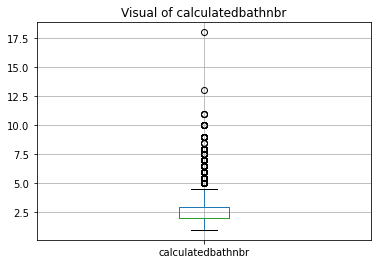

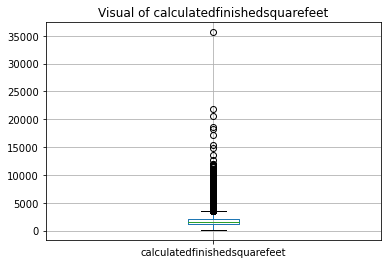

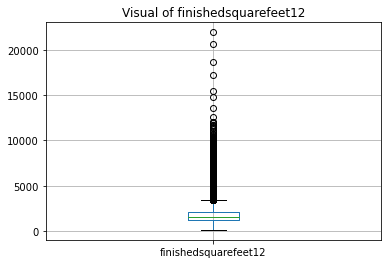

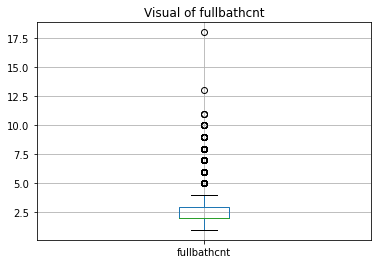

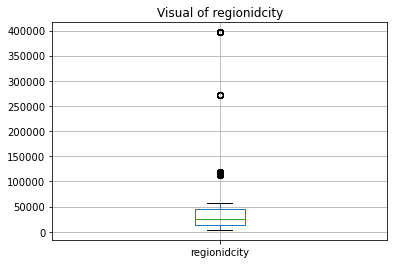

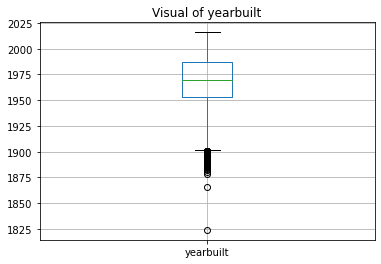

In [13]:
# show visuals for some numeral columns with nulls we need to impute
cols = df[['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
           'fullbathcnt', 'regionidcity', 'yearbuilt']]
for i in cols:
    df.boxplot(column=[i])
    plt.title('Visual of '+i)
    plt.show()

This gives me a quick visual of how I want to impute some of my nulls. 
It also tells me there are a handful of outliers in my data I will need to address.

In [14]:
# fill my nulls using my impute function

# imputing discrete columns with most frequent value
df = wrangle.impute(df, 'most_frequent', ['calculatedfinishedsquarefeet', 'calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])
    
# imputing continuous columns with median value
df = wrangle.impute(df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [15]:
# verify my nulls are gone
df.isnull().sum()

propertylandusetypeid           0
parcelid                        0
transactiondate                 0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
propertylandusedesc             0
dtype: int64

In [16]:
# view and remove my outliers
k = 1.5 # defines the upper and lower bound threshold
numerals = df.drop(columns = df[['propertylandusedesc', 'propertycountylandusecode', 'transactiondate']])


wrangle.remove_outliers(df, k, numerals)

For propertylandusetypeid the lower bound is 253.5 and  upper bound is 273.5
-----------------
For parcelid the lower bound is 7439844.25 and  upper bound is 18319594.25
-----------------
For id the lower bound is -1477935.25 and  upper bound is 4471178.75
-----------------
For bathroomcnt the lower bound is 0.5 and  upper bound is 4.5
-----------------
For bedroomcnt the lower bound is -1.0 and  upper bound is 7.0
-----------------
For calculatedbathnbr the lower bound is 0.5 and  upper bound is 4.5
-----------------
For calculatedfinishedsquarefeet the lower bound is -124.75 and  upper bound is 3305.25
-----------------
For finishedsquarefeet12 the lower bound is -17.5 and  upper bound is 3098.5
-----------------
For fips the lower bound is 6004.0 and  upper bound is 6092.0
-----------------
For fullbathcnt the lower bound is 0.5 and  upper bound is 4.5
-----------------
For latitude the lower bound is 33263150.0 and  upper bound is 34683550.0
-----------------
For longitude the lowe

In [20]:
df.sample(3).T

,22910,48859,5940
propertylandusetypeid,261,261,261
parcelid,14445477,12205584,10984949
transactiondate,2017-04-03,2017-06-21,2017-01-27
id,2831028,2750065,1568572
bathroomcnt,2,2,1
bedroomcnt,2,3,3
calculatedbathnbr,2,2,1
calculatedfinishedsquarefeet,2859,1778,1636
finishedsquarefeet12,2859,1778,1636
fips,6059,6037,6037


In [ ]:
def clean_zillow(df):
    '''
    This function takes in the zillow dataframe and cleans and prepares it by dropping nulls, dropping
    duplicates, replacing whitespaces, renaming columns and creating a new tax rate column.
    '''

    # drop any duplicates from the dataframe
    df.drop_duplicates(inplace=True)

    # this section addresses my fips code and 
    df['fips'] = df['fips'].astype(str)
    df.loc[df['fips'].str[0] == '6','state'] = 'California'
    df.loc[df['fips'].str.contains('111'),'county'] = 'Ventura'
    df.loc[df['fips'].str.contains('037'),'county'] = 'Los Angeles'
    df.loc[df['fips'].str.contains('059'),'county'] = 'Orange'
    df['fips'] = df['fips'].astype(float)
    
    # let's rename our columns so they are more clear
    df.rename(columns={'bedroomcnt': 'num_bedroom', 
                     'bathroomcnt': 'num_bathroom',
                     'calculatedfinishedsquarefeet': 'finished_sqft',
                     'taxvaluedollarcnt': 'tax_value',
                     'yearbuilt': 'build_year',
                     'taxamount': 'tax_amount'}, inplace=True)
    
    # now that we've been able to drop any houses with duplicate parcel ids, we can drop the column
    df.drop(columns=['parcelid', 'propertylandusetypeid', 'id', ], inplace=True)


    return df

In [24]:
df.columns

Index(['propertylandusetypeid', 'parcelid', 'transactiondate', 'id',
       'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'propertylandusedesc'],
      dtype='object')

## Prepare Takeaways:
 - First, address my nulls by dropping and imputing